In [1]:
%matplotlib inline
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from scipy import integrate
import seaborn as sns
import itertools
from matplotlib.lines import Line2D
import matplotlib.pylab as plb
from sklearn.linear_model import LinearRegression
import matplotlib.style as style
from matplotlib.patches import Patch

data_path = "/Users/kaylinlee/Desktop/KL_ISIpedia/Thesis/Code/Data/"
plot_path = "/Users/kaylinlee/Desktop/KL_ISIpedia/Thesis/Code/Plots/"

pd.set_option('display.max_columns', 500)

In [2]:
#uploading data 
equity_remind=pd.read_excel(data_path+'REMIND_equity_analysis.xls')
equity_image=pd.read_excel(data_path+'IMAGE_equity_analysis.xls')
allmodels_df=pd.read_excel(data_path+'MASTERDF_equity_analysis.xls') #master datafram with all regions from IMAGE and REMIND
allmodels_equal_df=pd.read_excel(data_path+'allmodels_df.xls') #consolidated with REMIND regions

In [3]:
regions_rem = ['AFR', 'CHN', 'EUR', 'IND', 'JPN', 'LAM', 'MEA', 'OAS', 'ROW', 'RUS', 'USA', 'World']
regions_ima = ['BRA', 'CAN', 'CEU', 'CHN', 'EAF', 'INDIA', 'INDO', 'JAP', 'KOR', 'ME', 'MEX', 'NAF',
 'OCE', 'RCAM', 'RSAF', 'RSAM', 'RSAS', 'RUS', 'SAF', 'SEAS', 'STAN', 'TUR', 'UKR',
 'USA', 'WAF', 'WEU', 'World']
regions_rem_noworld = ['AFR', 'CHN', 'EUR', 'IND', 'JPN', 'LAM', 'MEA', 'OAS', 'ROW', 'RUS', 'USA']
regions_ima_noworld = ['BRA', 'CAN', 'CEU', 'CHN', 'EAF', 'INDIA', 'INDO', 'JAP', 'KOR', 'ME', 'MEX', 'NAF',
 'OCE', 'RCAM', 'RSAF', 'RSAM', 'RSAS', 'RUS', 'SAF', 'SEAS', 'STAN', 'TUR', 'UKR',
 'USA', 'WAF', 'WEU']
remind_scens=['SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17', 'SSP1-26-SPA1-V17',
              'SSP2-26-SPA2-V17', 'SSP5-19-SPA5-V17', 'SSP5-26-SPA5-V17']
image_scens=['SSP1-19-SPA0-V17', 'SSP2-LF-SPA2-V17']

In [4]:
allmodels_df[(allmodels_df.Region==('World'))&(allmodels_df.Year==2100)]['CUM_BECCS'].median()

726712.6599999999

# Net Zero Delay Calculation

In [7]:
netzero_all=pd.read_excel(data_path+'netzero_all_models_NEW.xls')

In [8]:
scen_allmodels = ['SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17', 'SSP1-26-SPA1-V17',
       'SSP2-26-SPA2-V17', 'SSP5-19-SPA5-V17', 'SSP5-26-SPA5-V17',
       'SSP1-19-SPA0-V17', 'SSP2-LF-SPA2-V17']
scen_15_lo = ['SSP1-19-SPA0-V17'] #only no / limited overshoot
scen_15_ho = ['SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP5-19-SPA5-V17','SSP2-19-SPA2-V17'] # 1.5 high overshoot
scen_15_all= ['SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17', 'SSP5-19-SPA5-V17',
       'SSP1-19-SPA0-V17','SSP2-LF-SPA2-V17'] #all 1.5 scens
scen_2 = ['SSP2-26-SPA2-V17','SSP1-26-SPA1-V17', 'SSP5-26-SPA5-V17'] #2° scens

In [6]:
netzero_all.head(10)

,Unnamed: 0,MODEL,Region,Scenario,Year,Total_CO2,Total_GHG,BECCS,LANDCDR,TOTAL_CDR,CO2_Emissions,CUM_CO2,CUM_CDR,CUM_BECCS,Unit_CO2,BECCS_Investments,CUM_BECCS_Investments,Unit_Investment,Carbon_Price,Population,GDP,Unit_Population,cumPopulation,2016_emissions,em_change,Unit_GDP,GDP_cap,GDP_cap_avg,GDP_cap_CoI_nan,GDP_cap_CoI,GDP_CoI_nan,GDP_CoI,GDP_CoI_frac,CDR_fair_share_by_GDP,BECCS_fair_share_by_GDP,BECCS_investments_by_GDP,CUM_CDR_fair_share_by_GDP,CUM_BECCS_fair_share_by_GDP,CUM_BECCS_investments_by_GDP,Global_CUM_CO2_by_CUM_POP,Fair_share_by_CUM_POP,Excess_emissions_by_CUM_POP,Exc_em_fac_by_CUM_POP,CDR_fair_share_by_CUM_POP,BECCS_fair_share_by_CUM_POP,CUM_CDR_fair_share_by_CUM_POP,CUM_BECCS_fair_share_by_CUM_POP,CDR_model_vs_fair_share_by_CUM_POP,CDR_model_vs_fair_share_by_GDP,CUM_CDR_model_vs_fair_share_by_CUM_POP,CUM_CDR_model_vs_fair_share_by_GDP,BECCS_Investments_by_POP,CUM_BECCS_Investments_by_POP,BECCS_model_vs_fair_share_by_CUM_POP,BECCS_model_vs_fair_share_by_GDP,BECCS_invest_model_vs_FairShare_by_POP,BECCS_invest_model_vs_FairShare_by_GDP,CUM_BECCS_invest_model_vs_FairShare_by_POP,CUM_BECCS_invest_model_vs_FairShare_by_GDP,CUM_BECCS_model_vs_fair_share_by_CUM_POP,CUM_BECCS_model_vs_fair_share_by_GDP,5%_leakage:AP,10%_leakage:AP,15%_leakage:AP,20%_leakage:AP,25%_leakage:AP,5%_leakage:CPCE,10%_leakage:CPCE,15%_leakage:CPCE,20%_leakage:CPCE,25%_leakage:CPCE
0,0,REMIND,AFR,SSP1-19-SPA1-V17,2020,1215.4939,3233.0,0.0060,222.6215,222.6275,3455.6275,98289.528461,222.6275,0.0060,Mt/yr,0.0013,0.0013,billion US$2005/yr,1.000,996.7,2288000.0,Mio,21023.288404,3127.643169,1.104866,USD Million,2295.575399,13416.412568,NaN,0.000000,NaN,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.797535,142906.547734,-44617.019272,NaN,0.0,0.0,0.0,0.0,-222.6275,-222.627500,-222.6275,-222.627500,0.0,0.0,-0.0060,-0.006000,-0.0013,-0.001300,-0.0013,-0.001300,-0.0060,-0.006000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,1,REMIND,AFR,SSP1-19-SPA1-V17,2030,1212.0330,2952.0,30.8600,77.8637,108.7237,3060.7237,130871.284461,1879.3835,154.3360,Mt/yr,0.1373,0.6943,billion US$2005/yr,1.145,1181.0,4293000.0,Mio,31911.788404,3127.643169,0.978604,USD Million,3635.055038,18619.142572,NaN,0.000000,NaN,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.475300,206638.395114,-75767.110652,NaN,0.0,0.0,0.0,0.0,-108.7237,-108.723700,-1879.3835,-1879.383500,0.0,0.0,-30.8600,-30.860000,-0.1373,-0.137300,-0.6930,-0.693000,-154.3300,-154.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,2,REMIND,AFR,SSP1-19-SPA1-V17,2040,1618.5552,3692.0,352.2000,21.3519,373.5519,4065.5519,166502.662461,4290.7615,2069.6360,Mt/yr,0.0010,1.3858,billion US$2005/yr,1.865,1351.0,8860000.0,Mio,44571.788404,3127.643169,1.299877,USD Million,6558.105107,25680.047933,NaN,0.000000,NaN,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.933099,264448.849359,-97946.186898,NaN,0.0,0.0,0.0,0.0,-373.5519,-373.551900,-4290.7615,-4290.761500,0.0,0.0,-352.2000,-352.200000,-0.0010,-0.001000,-1.3845,-1.384500,-2069.6300,-2069.630000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,3,REMIND,AFR,SSP1-19-SPA1-V17,2050,388.3696,2444.0,949.0000,28.5074,977.5074,3421.5074,203937.958961,11046.0580,8575.6360,Mt/yr,0.0000,1.3908,billion US$2005/yr,3.038,1488.0,17450000.0,Mio,58766.788404,3127.643169,1.093957,USD Million,11727.150538,33297.960146,NaN,0.000000,NaN,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.380471,316193.006837,-112255.047876,NaN,0.0,0.0,0.0,0.0,-977.5074,-977.507400,-11046.0580,-11046.058000,0.0,0.0,-949.0000,-949.000000,0.0000,0.000000,-1.3895,-1.389500,-8575.6300,-8575.630000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,4,REMIND,AFR,SSP1-19-SPA1-V17,2060,-814.2021,738.9,1144.0000,43.1143,1187.1143,1926.0143,230675.567461,21869.1665,19040.6360,Mt/yr,0.0000,1.3908,billion US$2005/yr,4.949,1589.0,30720000.0,Mio,74151.788404,3127.64316

In [7]:
#creating a dataframe that contains only relevant columns
netzero_all_plot=netzero_all[['MODEL','Scenario','Year','Region','Total_GHG',
                              'TOTAL_CDR','CDR_fair_share_by_GDP','CDR_fair_share_by_CUM_POP',
                              'BECCS','BECCS_fair_share_by_GDP','BECCS_fair_share_by_CUM_POP',
                              'BECCS_model_vs_fair_share_by_CUM_POP','BECCS_model_vs_fair_share_by_GDP',
                              'CO2_Emissions',
                              '5%_leakage:AP','10%_leakage:AP','15%_leakage:AP','20%_leakage:AP','25%_leakage:AP',
                              '5%_leakage:CPCE','10%_leakage:CPCE','15%_leakage:CPCE','20%_leakage:CPCE','25%_leakage:CPCE']
                            ].copy().reset_index(drop=True)

In [7]:
#netzero_all_plot[(netzero_all_plot.Scenario==('SSP1-19-SPA1-V17'))&(netzero_all_plot.Region==('World'))]

In [29]:
# add new total_GHG (to see when we reach net zero with trading) 
# = CO2_Emissions - (Total_CDR + difference of BECCS fair share )(new TOTAL_CDR)
netzero_all_plot['New_total_GHG:AP'
                ]=netzero_all_plot["CO2_Emissions"]-((netzero_all_plot['TOTAL_CDR'])+(netzero_all_plot['BECCS_model_vs_fair_share_by_GDP']))

netzero_all_plot['New_total_GHG:CPCE'
                ]=netzero_all_plot["CO2_Emissions"]-(netzero_all_plot['TOTAL_CDR']+netzero_all_plot['BECCS_model_vs_fair_share_by_CUM_POP'])


In [30]:
# add new total_GHG (to see when we reach net zero) = CO2_Emissions - (CDR - BECCS leaked amount)(new TOTAL_CDR)
netzero_all_plot['Total_GHG_w_5%BECCS_leakage:AP'
                ]=netzero_all_plot["CO2_Emissions"
                                  ]-((netzero_all_plot['TOTAL_CDR'])+(netzero_all_plot['BECCS_model_vs_fair_share_by_GDP'])-(netzero_all_plot['5%_leakage:AP']))
netzero_all_plot['Total_GHG_w_10%BECCS_leakage:AP'
                ]=netzero_all_plot["CO2_Emissions"]-(netzero_all_plot['TOTAL_CDR']+(netzero_all_plot['BECCS_model_vs_fair_share_by_GDP'])-netzero_all_plot['10%_leakage:AP'])
netzero_all_plot['Total_GHG_w_15%BECCS_leakage:AP'
                ]=netzero_all_plot["CO2_Emissions"]-(netzero_all_plot['TOTAL_CDR']+(netzero_all_plot['BECCS_model_vs_fair_share_by_GDP'])-netzero_all_plot['15%_leakage:AP'])
netzero_all_plot['Total_GHG_w_20%BECCS_leakage:AP'
                ]=netzero_all_plot["CO2_Emissions"]-(netzero_all_plot['TOTAL_CDR']+(netzero_all_plot['BECCS_model_vs_fair_share_by_GDP'])-netzero_all_plot['20%_leakage:AP'])
netzero_all_plot['Total_GHG_w_25%BECCS_leakage:AP'
                ]=netzero_all_plot["CO2_Emissions"]-(netzero_all_plot['TOTAL_CDR']+(netzero_all_plot['BECCS_model_vs_fair_share_by_GDP'])-netzero_all_plot['25%_leakage:AP'])

netzero_all_plot['Total_GHG_w_5%BECCS_leakage:CPCE'
                ]=netzero_all_plot["CO2_Emissions"]-(netzero_all_plot['TOTAL_CDR']+netzero_all_plot['BECCS_model_vs_fair_share_by_CUM_POP']-netzero_all_plot['5%_leakage:CPCE'])
netzero_all_plot['Total_GHG_w_10%BECCS_leakage:CPCE'
                ]=netzero_all_plot["CO2_Emissions"]-(netzero_all_plot['TOTAL_CDR']+netzero_all_plot['BECCS_model_vs_fair_share_by_CUM_POP']-netzero_all_plot['10%_leakage:CPCE'])
netzero_all_plot['Total_GHG_w_15%BECCS_leakage:CPCE'
                ]=netzero_all_plot["CO2_Emissions"]-(netzero_all_plot['TOTAL_CDR']+netzero_all_plot['BECCS_model_vs_fair_share_by_CUM_POP']-netzero_all_plot['15%_leakage:CPCE'])
netzero_all_plot['Total_GHG_w_20%BECCS_leakage:CPCE'
                ]=netzero_all_plot["CO2_Emissions"]-(netzero_all_plot['TOTAL_CDR']+netzero_all_plot['BECCS_model_vs_fair_share_by_CUM_POP']-netzero_all_plot['20%_leakage:CPCE'])
netzero_all_plot['Total_GHG_w_25%BECCS_leakage:CPCE'
                ]=netzero_all_plot["CO2_Emissions"]-(netzero_all_plot['TOTAL_CDR']+netzero_all_plot['BECCS_model_vs_fair_share_by_CUM_POP']-netzero_all_plot['25%_leakage:CPCE'])


In [31]:
netzero_all_plot.to_excel(data_path+"netzero_all_plot.xls")

In [54]:
netzero_all_plot.loc[netzero_all_plot.Region==('World')
                    ][["CO2_Emissions",'TOTAL_CDR','5%_leakage:CPCE','Total_GHG_w_5%BECCS_leakage:CPCE']]

,CO2_Emissions,TOTAL_CDR,5%_leakage:CPCE,Total_GHG_w_5%BECCS_leakage:CPCE
99,50160.684900,690.684900,0.001619,49470.001619
100,37857.087100,767.087100,10.508425,37100.508425
101,29312.076700,3972.076700,96.886855,25436.886855
102,21648.009300,9838.009300,239.362647,12049.362647
103,12863.073500,12008.173500,270.557077,1125.457077
...,...,...,...,...
1129,16020.140604,15550.644907,247.301144,716.796841
1130,14767.808269,16573.262248,244.627134,-1560.826846
1131,14300.273322,16285.754279,227.909092,-1757.571866
1132,14161.906350,16623.317239,239.432169,-2221.978719


In [59]:
#GLOBAL delay in net zero w different amounts of leakage: AP
global_netzero_plot=netzero_all_plot.loc[netzero_all_plot.Region==('World')]
global_netzero_plot.loc[:,'Total_GHG'
                       ]=global_netzero_plot.loc[:,'Total_GHG']*10**-3
global_netzero_plot.loc[:,'Total_GHG_w_5%BECCS_leakage:AP'
                       ]=global_netzero_plot.loc[:,'Total_GHG_w_5%BECCS_leakage:AP']*10**-3
global_netzero_plot.loc[:,'Total_GHG_w_10%BECCS_leakage:AP'
                       ]=global_netzero_plot.loc[:,'Total_GHG_w_10%BECCS_leakage:AP']*10**-3
global_netzero_plot.loc[:,'Total_GHG_w_15%BECCS_leakage:AP'
                       ]=global_netzero_plot.loc[:,'Total_GHG_w_15%BECCS_leakage:AP']*10**-3
global_netzero_plot.loc[:,'Total_GHG_w_20%BECCS_leakage:AP'
                       ]=global_netzero_plot.loc[:,'Total_GHG_w_20%BECCS_leakage:AP']*10**-3
global_netzero_plot.loc[:,'Total_GHG_w_25%BECCS_leakage:AP'
                       ]=global_netzero_plot.loc[:,'Total_GHG_w_25%BECCS_leakage:AP']*10**-3


/Users/kaylinlee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


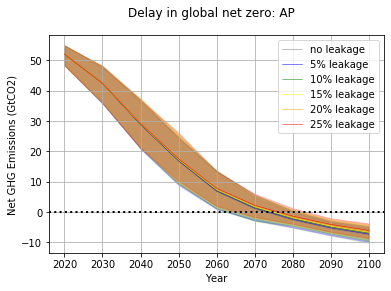

In [64]:
#plot 
ax=sns.lineplot(x='Year',y='Total_GHG',color='gray',linewidth=0.5, data=global_netzero_plot, label='no leakage')
ax=sns.lineplot(x='Year',y='Total_GHG_w_5%BECCS_leakage:AP',color='blue',linewidth=0.5 ,data=global_netzero_plot,label='5% leakage')
ax=sns.lineplot(x='Year',y='Total_GHG_w_10%BECCS_leakage:AP',color='green',linewidth=0.5,data=global_netzero_plot,label='10% leakage')
ax=sns.lineplot(x='Year',y='Total_GHG_w_15%BECCS_leakage:AP',color='yellow',linewidth=0.5,data=global_netzero_plot,label='15% leakage')
ax=sns.lineplot(x='Year',y='Total_GHG_w_20%BECCS_leakage:AP',color='orange',linewidth=0.5,data=global_netzero_plot,label='20% leakage')
ax=sns.lineplot(x='Year',y='Total_GHG_w_25%BECCS_leakage:AP',color='red',linewidth=0.5,data=global_netzero_plot,label='25% leakage')
plt.axhline(linewidth=2, linestyle="dotted", color='black')
ax.set(xlabel='Year', ylabel='Net GHG Emissions (GtCO2)')
plt.grid(True)
plt.suptitle('Delay in global net zero: AP', fontsize = 12)
plt.savefig(plot_path + 'netzero_delay:AP.png', dpi = 800, transparent = True, bbox_inches='tight')

/Users/kaylinlee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


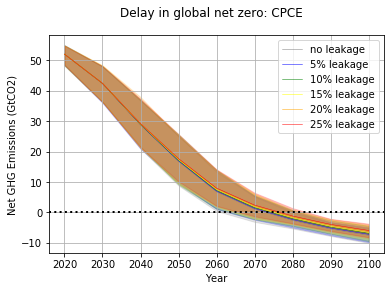

In [66]:
#GLOBAL delay in net zero w different amounts of leakage: CPCE 
global_netzero_plot=netzero_all_plot.loc[netzero_all_plot.Region==('World')]
global_netzero_plot.loc[:,'Total_GHG'
                       ]=global_netzero_plot.loc[:,'Total_GHG']*10**-3
global_netzero_plot.loc[:,'Total_GHG_w_5%BECCS_leakage:CPCE'
                       ]=global_netzero_plot.loc[:,'Total_GHG_w_5%BECCS_leakage:CPCE']*10**-3
global_netzero_plot.loc[:,'Total_GHG_w_10%BECCS_leakage:CPCE'
                       ]=global_netzero_plot.loc[:,'Total_GHG_w_10%BECCS_leakage:CPCE']*10**-3
global_netzero_plot.loc[:,'Total_GHG_w_15%BECCS_leakage:CPCE'
                       ]=global_netzero_plot.loc[:,'Total_GHG_w_15%BECCS_leakage:CPCE']*10**-3
global_netzero_plot.loc[:,'Total_GHG_w_20%BECCS_leakage:CPCE'
                       ]=global_netzero_plot.loc[:,'Total_GHG_w_20%BECCS_leakage:CPCE']*10**-3
global_netzero_plot.loc[:,'Total_GHG_w_25%BECCS_leakage:CPCE'
                       ]=global_netzero_plot.loc[:,'Total_GHG_w_25%BECCS_leakage:CPCE']*10**-3

ax=sns.lineplot(x='Year',y='Total_GHG',color='gray',linewidth=0.5, data=global_netzero_plot, label='no leakage')
ax=sns.lineplot(x='Year',y='Total_GHG_w_5%BECCS_leakage:CPCE',color='blue',linewidth=0.5 ,data=global_netzero_plot,label='5% leakage')
ax=sns.lineplot(x='Year',y='Total_GHG_w_10%BECCS_leakage:CPCE',color='green',linewidth=0.5,data=global_netzero_plot,label='10% leakage')
ax=sns.lineplot(x='Year',y='Total_GHG_w_15%BECCS_leakage:CPCE',color='yellow',linewidth=0.5,data=global_netzero_plot,label='15% leakage')
ax=sns.lineplot(x='Year',y='Total_GHG_w_20%BECCS_leakage:CPCE',color='orange',linewidth=0.5,data=global_netzero_plot,label='20% leakage')
ax=sns.lineplot(x='Year',y='Total_GHG_w_25%BECCS_leakage:CPCE',color='red',linewidth=0.5,data=global_netzero_plot,label='25% leakage')
plt.axhline(linewidth=2, linestyle="dotted", color='black')
ax.set(xlabel='Year', ylabel='Net GHG Emissions (GtCO2)')
plt.grid(True)
plt.suptitle('Delay in global net zero: CPCE', fontsize = 12)
plt.savefig(plot_path + 'netzero_delay:CPCE.png', dpi = 800, transparent = True, bbox_inches='tight')

In [68]:
global_netzero_plot

,MODEL,Scenario,Year,Region,Total_GHG,TOTAL_CDR,BECCS,CO2_Emissions,5%_leakage:AP,10%_leakage:AP,15%_leakage:AP,20%_leakage:AP,25%_leakage:AP,5%_leakage:CPCE,10%_leakage:CPCE,15%_leakage:CPCE,20%_leakage:CPCE,25%_leakage:CPCE,Total_GHG_w_5%BECCS_leakage:AP,Total_GHG_w_10%BECCS_leakage:AP,Total_GHG_w_15%BECCS_leakage:AP,Total_GHG_w_20%BECCS_leakage:AP,Total_GHG_w_25%BECCS_leakage:AP,Total_GHG_w_5%BECCS_leakage:CPCE,Total_GHG_w_10%BECCS_leakage:CPCE,Total_GHG_w_15%BECCS_leakage:CPCE,Total_GHG_w_20%BECCS_leakage:CPCE,Total_GHG_w_25%BECCS_leakage:CPCE
99,REMIND,SSP1-19-SPA1-V17,2020,World,49.470000,690.684900,0.059800,50160.684900,0.001731,0.003462,0.005193,0.006925,0.008656,0.001619,0.003237,0.004856,0.006475,0.008093,49470.001731,49470.003462,49470.005193,49470.006925,49470.008656,49.470002,49.470003,49.470005,49.470006,49.470008
100,REMIND,SSP1-19-SPA1-V17,2030,World,37.090000,767.087100,424.200000,37857.087100,8.004400,16.008800,24.013200,32.017600,40.022000,10.508425,21.016849,31.525274,42.033699,52.542123,37098.004400,37106.008800,37114.013200,37122.017600,37130.022000,37.100508,37.111017,37.121525,37.132034,37.142542
101,REMIND,SSP1-19-SPA1-V17,2040,World,25.340000,3972.076700,3788.000000,29312.076700,81.130000,162.260000,243.390000,324.520000,405.650000,96.886855,193.773709,290.660564,387.547419,484.434273,25421.130000,25502.260000,25583.390000,25664.520000,25745.650000,25.436887,25.533774,25.630661,25.727547,25.824434
102,REMIND,SSP1-19-SPA1-V17,2050,World,11.810000,9838.009300,9330.000000,21648.009300,166.705000,333.410000,500.115000,666.820000,833.525000,239.362647,478.725294,718.087942,957.450589,1196.813236,11976.705000,12143.410000,12310.115000,12476.820000,12643.525000,12.049363,12.288725,12.528088,12.767451,13.006813
103,REMIND,SSP1-19-SPA1-V17,2060,World,0.854900,12008.173500,10940.000000,12863.073500,205.600000,411.200000,616.800000,822.400000,1028.000000,270.557077,541.114154,811.671230,1082.228307,1352.785384,1060.500000,1266.100000,1471.700000,1677.300000,1882.900000,1.125457,1.396014,1.666571,1.937128,2.207685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,IMAGE,SSP2-LF-SPA2-V17,2060,World,0.469496,15550.644907,12714.519672,16020.140604,287.736513,575.473026,863.209538,1150.946051,1438.682564,247.301144,494.602287,741.903431,989.204574,1236.505718,757.232210,1044.968723,1332.705235,1620.441748,1908.178261,0.716797,0.964098,1.211399,1.458700,1.706001
1130,IMAGE,SSP2-LF-SPA2-V17,2070,World,-1.805454,16573.262248,13032.749408,14767.808269,266.352149,532.704298,799.056446,1065.408595,1331.760744,244.627134,489.254267,733.881401,978.508535,1223.135669,-1539.101831,-1272.749682,-1006.397533,-740.045384,-473.693236,-1.560827,-1.316200,-1.071573,-0.826945,-0.582318
1131,IMAGE,SSP2-LF-SPA2-V17,2080,World,-1.985481,16285.754279,13220.857297,14300.273322,260.755307,521.510615,782.265922,1043.021229,1303.776537,227.909092,455.818183,683.727275,911.636366,1139.545458,-1724.725650,-1463.970342,-1203.215035,-942.459728,-681.704420,-1.757572,-1.529663,-1.301754,-1.073845,-0.845935
1132,IMAGE,SSP2-LF-SPA2-V17,2090,World,-2.461411,16623.317239,13840.149817,14161.906350,287.049372,574.098744,861.148116,1148.197488,1435.246860,239.432169,478.864339,718.296508,957.728678,1197.160847,-2174.361517,-1887.312145,-1600.262773,-1313.213401,-1026.164029,-2.221979,-1.982547,-1.743114,-1.503682,-1.264250


In [13]:
def get_year_netzero(main_df, scen, leakage_rate):
    
    interp_years=main_df.loc[main_df.Scenario==(scen)]['Year'].values
    interp_emissions=main_df.loc[main_df.Scenario==(scen)][leakage_rate].values
    netzero_year=np.interp(0, interp_emissions[::-1], interp_years[::-1])
    
    return netzero_year

In [77]:
def create_netzero_table_AP(main_df):
    scens=main_df.Scenario.unique()
    netzero_df=pd.DataFrame(columns=['Model', 'Scenario', 'NetZero_w_no_leakage',
                                     'NetZero_w_5%leakage','NetZero_w_10%leakage',
                                     'NetZero_w_15%leakage','NetZero_w_20%leakage', 
                                     'NetZero_w_25%leakage'])  
    netzero_df['Scenario']=scens
    netzero_df['Model']=['REMIND','REMIND','REMIND','REMIND','REMIND','REMIND','IMAGE','IMAGE']
    
    for i in np.arange(0,len(scens)):
        netzero_df.loc[i,'NetZero_w_no_leakage']=get_year_netzero(main_df, scens[i],'Total_GHG')
        netzero_df.loc[i,'NetZero_w_5%leakage']=get_year_netzero(main_df, scens[i],'Total_GHG_w_5%BECCS_leakage:AP')
        netzero_df.loc[i,'NetZero_w_10%leakage']=get_year_netzero(main_df, scens[i],'Total_GHG_w_10%BECCS_leakage:AP')
        netzero_df.loc[i,'NetZero_w_15%leakage']=get_year_netzero(main_df, scens[i],'Total_GHG_w_15%BECCS_leakage:AP')
        netzero_df.loc[i,'NetZero_w_20%leakage']=get_year_netzero(main_df, scens[i],'Total_GHG_w_20%BECCS_leakage:AP')
        netzero_df.loc[i,'NetZero_w_25%leakage']=get_year_netzero(main_df, scens[i],'Total_GHG_w_25%BECCS_leakage:AP')
        
    return netzero_df

In [91]:
Netzero_delay_AP=create_netzero_table_AP(global_netzero_plot)
Netzero_delay_AP=Netzero_delay_AP.round(2)

In [100]:
Netzero_delay_AP.to_excel(data_path+'netzero_delay_yrs_AP.xls')

,Model,Scenario,NetZero_w_no_leakage,NetZero_w_5%leakage,NetZero_w_10%leakage,NetZero_w_15%leakage,NetZero_w_20%leakage,NetZero_w_25%leakage
0,REMIND,SSP1-19-SPA1-V17,2062.17,2062.7,2063.22,2063.75,2064.28,2064.82
1,REMIND,SSP2-19-SPA2-V17,2054.19,2054.9,2055.62,2056.35,2057.1,2057.86
2,REMIND,SSP1-26-SPA1-V17,2087.17,2087.58,2087.99,2088.39,2088.81,2089.22
3,REMIND,SSP2-26-SPA2-V17,2083.68,2084.34,2085.01,2085.68,2086.35,2087.03
4,REMIND,SSP5-19-SPA5-V17,2057.38,2057.6,2057.83,2058.07,2058.3,2058.54
5,REMIND,SSP5-26-SPA5-V17,2076.57,2076.98,2077.4,2077.82,2078.24,2078.67
6,IMAGE,SSP1-19-SPA0-V17,2076.13,2076.66,2077.2,2077.75,2078.33,2078.92
7,IMAGE,SSP2-LF-SPA2-V17,2062.06,2063.3,2064.51,2065.7,2066.86,2068.01


In [80]:
def create_netzero_table_CPCE(main_df):
    scens=main_df.Scenario.unique()
    netzero_df=pd.DataFrame(columns=['Model', 'Scenario', 'NetZero_w_no_leakage',
                                     'NetZero_w_5%leakage','NetZero_w_10%leakage',
                                     'NetZero_w_15%leakage','NetZero_w_20%leakage', 
                                     'NetZero_w_25%leakage'])  
    netzero_df['Scenario']=scens
    netzero_df['Model']=['REMIND','REMIND','REMIND','REMIND','REMIND','REMIND','IMAGE','IMAGE']
    
    for i in np.arange(0,len(scens)):
        netzero_df.loc[i,'NetZero_w_no_leakage']=get_year_netzero(main_df, scens[i],'Total_GHG')
        netzero_df.loc[i,'NetZero_w_5%leakage']=get_year_netzero(main_df, scens[i],'Total_GHG_w_5%BECCS_leakage:CPCE')
        netzero_df.loc[i,'NetZero_w_10%leakage']=get_year_netzero(main_df, scens[i],'Total_GHG_w_10%BECCS_leakage:CPCE')
        netzero_df.loc[i,'NetZero_w_15%leakage']=get_year_netzero(main_df, scens[i],'Total_GHG_w_15%BECCS_leakage:CPCE')
        netzero_df.loc[i,'NetZero_w_20%leakage']=get_year_netzero(main_df, scens[i],'Total_GHG_w_20%BECCS_leakage:CPCE')
        netzero_df.loc[i,'NetZero_w_25%leakage']=get_year_netzero(main_df, scens[i],'Total_GHG_w_25%BECCS_leakage:CPCE')
        
    return netzero_df

In [81]:
Netzero_delay_CPCE=create_netzero_table_CPCE(global_netzero_plot)
Netzero_delay_CPCE

,Model,Scenario,NetZero_w_no_leakage,NetZero_w_5%leakage,NetZero_w_10%leakage,NetZero_w_15%leakage,NetZero_w_20%leakage,NetZero_w_25%leakage
0,REMIND,SSP1-19-SPA1-V17,2062.17,2062.85,2063.54,2064.22,2064.9,2065.58
1,REMIND,SSP2-19-SPA2-V17,2054.19,2054.95,2055.73,2056.51,2057.31,2058.11
2,REMIND,SSP1-26-SPA1-V17,2087.17,2087.65,2088.13,2088.61,2089.09,2089.57
3,REMIND,SSP2-26-SPA2-V17,2083.68,2084.39,2085.1,2085.82,2086.56,2087.3
4,REMIND,SSP5-19-SPA5-V17,2057.38,2057.65,2057.92,2058.2,2058.48,2058.76
5,REMIND,SSP5-26-SPA5-V17,2076.57,2077.05,2077.53,2078.03,2078.52,2079.02
6,IMAGE,SSP1-19-SPA0-V17,2076.13,2076.57,2077.01,2077.47,2077.94,2078.43
7,IMAGE,SSP2-LF-SPA2-V17,2062.06,2063.15,2064.23,2065.31,2066.38,2067.46


In [176]:
(Netzero_delay_AP['NetZero_w_5%leakage']-Netzero_delay_AP['NetZero_w_no_leakage']).mean()

0.5872895384465551

In [101]:
Netzero_delay_CPCE.to_excel(data_path+'netzero_delay_yrs_CPCE.xls')

In [177]:
#AP Median -all
Netzero_delay_AP[['NetZero_w_no_leakage','NetZero_w_5%leakage','NetZero_w_10%leakage',
                         'NetZero_w_15%leakage','NetZero_w_20%leakage',
                         'NetZero_w_25%leakage']].median().round(2)

NetZero_w_no_leakage    2069.15
NetZero_w_5%leakage     2069.98
NetZero_w_10%leakage    2070.85
NetZero_w_15%leakage    2071.73
NetZero_w_20%leakage    2072.55
NetZero_w_25%leakage    2073.34
dtype: float64

In [265]:
#AP Median -1.5 compatible
Netzero_delay_AP.loc[Netzero_delay_AP.Scenario.isin(scen_15_all)][['NetZero_w_no_leakage','NetZero_w_5%leakage','NetZero_w_10%leakage',
                'NetZero_w_15%leakage','NetZero_w_20%leakage','NetZero_w_25%leakage']].median()

NetZero_w_no_leakage    2062.063763
NetZero_w_5%leakage     2062.696346
NetZero_w_10%leakage    2063.223843
NetZero_w_15%leakage    2063.752901
NetZero_w_20%leakage    2064.283525
NetZero_w_25%leakage    2064.815724
dtype: float64

In [266]:
#AP Median -2 compatible
Netzero_delay_AP.loc[Netzero_delay_AP.Scenario.isin(scen_2)][['NetZero_w_no_leakage','NetZero_w_5%leakage','NetZero_w_10%leakage',
                'NetZero_w_15%leakage','NetZero_w_20%leakage','NetZero_w_25%leakage']].median()

NetZero_w_no_leakage    2083.683036
NetZero_w_5%leakage     2084.341124
NetZero_w_10%leakage    2085.005162
NetZero_w_15%leakage    2085.675230
NetZero_w_20%leakage    2086.351411
NetZero_w_25%leakage    2087.033789
dtype: float64

In [178]:
#CPCE Median - all
Netzero_delay_CPCE[['NetZero_w_no_leakage','NetZero_w_5%leakage','NetZero_w_10%leakage',
                         'NetZero_w_15%leakage','NetZero_w_20%leakage',
                         'NetZero_w_25%leakage']].median().round(2)

NetZero_w_no_leakage    2069.15
NetZero_w_5%leakage     2069.86
NetZero_w_10%leakage    2070.62
NetZero_w_15%leakage    2071.39
NetZero_w_20%leakage    2072.16
NetZero_w_25%leakage    2072.94
dtype: float64

In [267]:
#CPCE Median -1.5 compatible
Netzero_delay_CPCE.loc[Netzero_delay_CPCE.Scenario.isin(scen_15_all)][['NetZero_w_no_leakage','NetZero_w_5%leakage','NetZero_w_10%leakage',
                'NetZero_w_15%leakage','NetZero_w_20%leakage','NetZero_w_25%leakage']].median()

NetZero_w_no_leakage    2062.063763
NetZero_w_5%leakage     2062.854286
NetZero_w_10%leakage    2063.536734
NetZero_w_15%leakage    2064.217751
NetZero_w_20%leakage    2064.897342
NetZero_w_25%leakage    2065.575511
dtype: float64

In [268]:
#CPCE Median -2 compatible
Netzero_delay_CPCE.loc[Netzero_delay_CPCE.Scenario.isin(scen_2)][['NetZero_w_no_leakage','NetZero_w_5%leakage','NetZero_w_10%leakage',
                'NetZero_w_15%leakage','NetZero_w_20%leakage','NetZero_w_25%leakage']].median()

NetZero_w_no_leakage    2083.683036
NetZero_w_5%leakage     2084.388023
NetZero_w_10%leakage    2085.101726
NetZero_w_15%leakage    2085.824307
NetZero_w_20%leakage    2086.555932
NetZero_w_25%leakage    2087.296774
dtype: float64

# Regional Net Zero Delay
### countries w big burdens (+ new net zero after trading takes place, 2nd new net zero with leakage)  
### AP: CHN, EUR/ CPCE: USA, RUS

In [4]:
netzero_all_plot=pd.read_excel(data_path+"netzero_all_plot.xls")

In [5]:
#IMAGE & REMIND have different region categorization
#IMAGE: use two regions 'CEU', 'WEU' for EUR!!
EUR_IMAGE=netzero_all_plot.loc[(netzero_all_plot.Region==('CEU'))|(netzero_all_plot.Region==('WEU'))].copy()
EUR_REMIND=netzero_all_plot.loc[(netzero_all_plot.Region==('EUR'))].copy()

In [6]:
#combine CEU values and WEU values and create new rows with EUR values

sumColums=['Total_GHG', 'New_total_GHG:AP','New_total_GHG:CPCE','TOTAL_CDR', 'BECCS',
           'BECCS_fair_share_by_GDP','BECCS_model_vs_fair_share_by_GDP', 
           'BECCS_fair_share_by_CUM_POP','BECCS_model_vs_fair_share_by_CUM_POP', 
           'CO2_Emissions', '5%_leakage:AP', '10%_leakage:AP',
       '15%_leakage:AP', '20%_leakage:AP', '25%_leakage:AP', '5%_leakage:CPCE',
       '10%_leakage:CPCE', '15%_leakage:CPCE', '20%_leakage:CPCE',
       '25%_leakage:CPCE', 'Total_GHG_w_5%BECCS_leakage:AP',
       'Total_GHG_w_10%BECCS_leakage:AP', 'Total_GHG_w_15%BECCS_leakage:AP',
       'Total_GHG_w_20%BECCS_leakage:AP', 'Total_GHG_w_25%BECCS_leakage:AP',
       'Total_GHG_w_5%BECCS_leakage:CPCE', 'Total_GHG_w_10%BECCS_leakage:CPCE',
       'Total_GHG_w_15%BECCS_leakage:CPCE',
       'Total_GHG_w_20%BECCS_leakage:CPCE',
       'Total_GHG_w_25%BECCS_leakage:CPCE']

mask_reg = EUR_IMAGE.Region.isin(['CEU', 'WEU'])
for sce in EUR_IMAGE.Scenario.unique():
    mask_sce = (EUR_IMAGE.Scenario == sce)
    for year in EUR_IMAGE.Year.unique():
        mask_year = (EUR_IMAGE.Year == year)
        filtered_df = EUR_IMAGE.loc[mask_sce & mask_reg & mask_year,:]
        result = EUR_IMAGE.loc[mask_sce & mask_reg & mask_year, sumColums].sum(axis=0)
        idx = len(EUR_IMAGE)+1
        EUR_IMAGE.loc[idx,:] = filtered_df.iloc[0]
        EUR_IMAGE.loc[idx,sumColums] = result
        EUR_IMAGE.loc[idx,'Region'] = 'EUR'

In [7]:
#AP
EUR_IMAGE=EUR_IMAGE.loc[EUR_IMAGE.Region==('EUR')]
EUR_netzero=pd.concat([EUR_IMAGE, EUR_REMIND],ignore_index=True, sort=False)

In [8]:
#AP
CHN_netzero=netzero_all_plot.loc[netzero_all_plot.Region==('CHN')].copy()

#CPCE
USA_netzero=netzero_all_plot.loc[netzero_all_plot.Region==('USA')].copy()
RUS_netzero=netzero_all_plot.loc[netzero_all_plot.Region==('RUS')].copy()

In [37]:
EUR_netzero.loc[(EUR_netzero.Scenario==('SSP1-19-SPA0-V17'))][['Year','Total_GHG','New_total_GHG:AP','CO2_Emissions','TOTAL_CDR','BECCS','BECCS_fair_share_by_GDP','BECCS_model_vs_fair_share_by_GDP']]

,Year,Total_GHG,New_total_GHG:AP,CO2_Emissions,TOTAL_CDR,BECCS,BECCS_fair_share_by_GDP,BECCS_model_vs_fair_share_by_GDP
0,2020.0,3773.132568,3760.756730,4151.639229,378.506661,5.484093,17.859931,12.375838
1,2030.0,1959.772980,1725.710782,2625.280812,665.507832,65.735437,299.797636,234.062198
2,2040.0,1004.121582,683.069652,1865.200370,861.078788,256.600799,577.652729,321.051930
3,2050.0,400.056263,379.624264,1336.437587,936.381324,615.125166,635.557165,20.431999
4,2060.0,57.311310,129.897833,1124.118742,1066.807433,854.556783,781.970259,-72.586523
5,2070.0,-739.448883,-628.356909,998.452521,1737.901404,1233.431529,1122.339555,-111.091974
6,2080.0,-861.851624,-888.846024,989.851060,1851.702684,1508.913595,1535.907996,26.994401
7,2090.0,-1028.026184,-1619.997733,937.662807,1965.688991,1489.090079,2081.061628,591.971549
8,2100.0,-1047.837708,-2422.711629,915.590639,1963.428347,1565.002058,2939.875980,1374.873921


In [32]:
CHN_netzero.loc[(CHN_netzero.Scenario==('SSP1-19-SPA0-V17'))][['Year','New_total_GHG:AP','CO2_Emissions','TOTAL_CDR','BECCS','BECCS_fair_share_by_GDP','BECCS_model_vs_fair_share_by_GDP']]

,Year,New_total_GHG:AP,CO2_Emissions,TOTAL_CDR,BECCS,BECCS_fair_share_by_GDP,BECCS_model_vs_fair_share_by_GDP
675,2020,10254.466531,10480.732722,209.602839,9.475533,26.138885,16.663352
676,2030,6576.094698,7566.120967,649.543818,327.623530,668.105980,340.482450
677,2040,1337.491166,3343.202547,1097.122469,636.116265,1544.705177,908.588912
678,2050,-132.951104,2188.217314,1232.731902,660.541806,1748.978323,1088.436517
679,2060,-913.316023,1779.265321,1475.247316,776.808979,1994.143008,1217.334028
680,2070,-1408.187374,1633.368443,1541.212705,1019.934080,2520.277193,1500.343113
681,2080,-2079.504416,1370.197057,1594.944463,1122.874037,2977.631047,1854.757010
682,2090,-2726.275699,1182.984331,1506.922716,1060.400172,3462.737486,2402.337314
683,2100,-3437.565713,1041.769881,1603.112166,1295.019833,4171.243260,2876.223427


In [10]:
def create_regional_netzero_table_AP(main_df):
    scens=main_df.Scenario.unique()
    netzero_df=pd.DataFrame(columns=['Scenario', 'Model_NetZero','NetZero_w_no_leakage',
                                     'NetZero_w_5%leakage','NetZero_w_10%leakage',
                                     'NetZero_w_15%leakage','NetZero_w_20%leakage', 
                                     'NetZero_w_25%leakage'])  
    netzero_df['Scenario']=scens
    #netzero_df['Model']=['REMIND','REMIND','REMIND','REMIND','REMIND','REMIND','IMAGE','IMAGE']
    
    for i in np.arange(0,len(scens)):
        netzero_df.loc[i,'Model_NetZero']=get_year_netzero(main_df, scens[i],'Total_GHG')
        netzero_df.loc[i,'NetZero_w_no_leakage']=get_year_netzero(main_df, scens[i],'New_total_GHG:AP')
        netzero_df.loc[i,'NetZero_w_5%leakage']=get_year_netzero(main_df, scens[i],'Total_GHG_w_5%BECCS_leakage:AP')
        netzero_df.loc[i,'NetZero_w_10%leakage']=get_year_netzero(main_df, scens[i],'Total_GHG_w_10%BECCS_leakage:AP')
        netzero_df.loc[i,'NetZero_w_15%leakage']=get_year_netzero(main_df, scens[i],'Total_GHG_w_15%BECCS_leakage:AP')
        netzero_df.loc[i,'NetZero_w_20%leakage']=get_year_netzero(main_df, scens[i],'Total_GHG_w_20%BECCS_leakage:AP')
        netzero_df.loc[i,'NetZero_w_25%leakage']=get_year_netzero(main_df, scens[i],'Total_GHG_w_25%BECCS_leakage:AP')
        
    return netzero_df

In [23]:
EUR_netzero_yr=create_regional_netzero_table_AP(EUR_netzero)

In [26]:
EUR_netzero_yr.to_excel(data_path+'EUR_netzero_yr_oct20.xls')

In [24]:
CHN_netzero_yr=create_regional_netzero_table_AP(CHN_netzero)

In [25]:
CHN_netzero_yr.to_excel(data_path+'CHN_netzero_yr_oct20.xls')
# [['Scenario','NetZero_w_no_leakage','NetZero_w_5%leakage','NetZero_w_10%leakage',
#                 'NetZero_w_15%leakage','NetZero_w_20%leakage','NetZero_w_25%leakage']].median()

In [10]:
EUR_netzero_yr=pd.read_excel(data_path+'EUR_netzero_yr_oct20.xls')
CHN_netzero_yr=pd.read_excel(data_path+'CHN_netzero_yr_oct20.xls')

In [5]:
CHN_netzero_yr[['Model_NetZero','NetZero_w_no_leakage','NetZero_w_5%leakage','NetZero_w_10%leakage',
                'NetZero_w_15%leakage','NetZero_w_20%leakage','NetZero_w_25%leakage']].median()

Model_NetZero           2062.602525
NetZero_w_no_leakage    2048.484620
NetZero_w_5%leakage     2048.781916
NetZero_w_10%leakage    2049.084694
NetZero_w_15%leakage    2049.487295
NetZero_w_20%leakage    2049.973544
NetZero_w_25%leakage    2050.469685
dtype: float64

In [40]:
CHN_netzero_yr.loc[CHN_netzero_yr.Scenario.isin(scen_15_all)][['Model_NetZero','NetZero_w_no_leakage','NetZero_w_5%leakage','NetZero_w_10%leakage',
                'NetZero_w_15%leakage','NetZero_w_20%leakage','NetZero_w_25%leakage']].median()

Model_NetZero           2057.787780
NetZero_w_no_leakage    2046.142883
NetZero_w_5%leakage     2046.476769
NetZero_w_10%leakage    2046.815369
NetZero_w_15%leakage    2047.158785
NetZero_w_20%leakage    2047.507118
NetZero_w_25%leakage    2047.860477
dtype: float64

In [41]:
CHN_netzero_yr.loc[CHN_netzero_yr.Scenario.isin(scen_2)][['Model_NetZero','NetZero_w_no_leakage','NetZero_w_5%leakage','NetZero_w_10%leakage',
                'NetZero_w_15%leakage','NetZero_w_20%leakage','NetZero_w_25%leakage']].median()

Model_NetZero           2069.760855
NetZero_w_no_leakage    2060.101479
NetZero_w_5%leakage     2060.443659
NetZero_w_10%leakage    2060.796502
NetZero_w_15%leakage    2061.160515
NetZero_w_20%leakage    2061.536236
NetZero_w_25%leakage    2061.924241
dtype: float64

In [42]:
EUR_netzero_yr[['Model_NetZero','NetZero_w_no_leakage','NetZero_w_5%leakage','NetZero_w_10%leakage',
                'NetZero_w_15%leakage','NetZero_w_20%leakage','NetZero_w_25%leakage']].median()

Model_NetZero           2063.817775
NetZero_w_no_leakage    2057.021616
NetZero_w_5%leakage     2057.246535
NetZero_w_10%leakage    2057.474190
NetZero_w_15%leakage    2057.704652
NetZero_w_20%leakage    2057.937997
NetZero_w_25%leakage    2058.174300
dtype: float64

In [43]:
EUR_netzero_yr.loc[EUR_netzero_yr.Scenario.isin(scen_15_all)][['Model_NetZero','NetZero_w_no_leakage','NetZero_w_5%leakage','NetZero_w_10%leakage',
                'NetZero_w_15%leakage','NetZero_w_20%leakage','NetZero_w_25%leakage']].median()

Model_NetZero           2062.598823
NetZero_w_no_leakage    2048.269366
NetZero_w_5%leakage     2048.483770
NetZero_w_10%leakage    2048.703325
NetZero_w_15%leakage    2048.928219
NetZero_w_20%leakage    2049.158649
NetZero_w_25%leakage    2049.394822
dtype: float64

In [44]:
EUR_netzero_yr.loc[EUR_netzero_yr.Scenario.isin(scen_2)][['Model_NetZero','NetZero_w_no_leakage','NetZero_w_5%leakage','NetZero_w_10%leakage',
                'NetZero_w_15%leakage','NetZero_w_20%leakage','NetZero_w_25%leakage']].median()

Model_NetZero           2090.426842
NetZero_w_no_leakage    2064.557764
NetZero_w_5%leakage     2065.004259
NetZero_w_10%leakage    2065.606414
NetZero_w_15%leakage    2066.236147
NetZero_w_20%leakage    2066.895395
NetZero_w_25%leakage    2067.586284
dtype: float64

In [11]:
def create_regional_netzero_table_CPCE(main_df):
    scens=main_df.Scenario.unique()
    netzero_df=pd.DataFrame(columns=['Scenario', 'Model_NetZero','NetZero_w_no_leakage',
                                     'NetZero_w_5%leakage','NetZero_w_10%leakage',
                                     'NetZero_w_15%leakage','NetZero_w_20%leakage', 
                                     'NetZero_w_25%leakage'])  
    netzero_df['Scenario']=scens
    #netzero_df['Model']=['REMIND','REMIND','REMIND','REMIND','REMIND','REMIND','IMAGE','IMAGE']
    
    for i in np.arange(0,len(scens)):
        netzero_df.loc[i,'Model_NetZero']=get_year_netzero(main_df, scens[i],'Total_GHG')
        netzero_df.loc[i,'NetZero_w_no_leakage']=get_year_netzero(main_df, scens[i],'New_total_GHG:CPCE')
        netzero_df.loc[i,'NetZero_w_5%leakage']=get_year_netzero(main_df, scens[i],'Total_GHG_w_5%BECCS_leakage:CPCE')
        netzero_df.loc[i,'NetZero_w_10%leakage']=get_year_netzero(main_df, scens[i],'Total_GHG_w_10%BECCS_leakage:CPCE')
        netzero_df.loc[i,'NetZero_w_15%leakage']=get_year_netzero(main_df, scens[i],'Total_GHG_w_15%BECCS_leakage:CPCE')
        netzero_df.loc[i,'NetZero_w_20%leakage']=get_year_netzero(main_df, scens[i],'Total_GHG_w_20%BECCS_leakage:CPCE')
        netzero_df.loc[i,'NetZero_w_25%leakage']=get_year_netzero(main_df, scens[i],'Total_GHG_w_25%BECCS_leakage:CPCE')
        
    return netzero_df

In [46]:
USA_netzero_yr=create_regional_netzero_table_CPCE(USA_netzero)
USA_netzero_yr.to_excel(data_path+'USA_netzero_yr_oct20.xls')

In [49]:
RUS_netzero_yr=create_regional_netzero_table_CPCE(RUS_netzero)
RUS_netzero_yr.to_excel(data_path+'RUS_netzero_yr_0ct20.xls')

In [9]:
USA_netzero_yr=pd.read_excel(data_path+'USA_netzero_yr_oct20.xls')
RUS_netzero_yr=pd.read_excel(data_path+'RUS_netzero_yr_oct20.xls')

In [8]:
USA_netzero_yr[['Model_NetZero','NetZero_w_no_leakage','NetZero_w_5%leakage','NetZero_w_10%leakage',
                'NetZero_w_15%leakage','NetZero_w_20%leakage','NetZero_w_25%leakage']].median()

Model_NetZero           2060.012321
NetZero_w_no_leakage    2045.214399
NetZero_w_5%leakage     2045.514542
NetZero_w_10%leakage    2045.831909
NetZero_w_15%leakage    2046.168071
NetZero_w_20%leakage    2046.524803
NetZero_w_25%leakage    2046.904116
dtype: float64

In [47]:
USA_netzero_yr.loc[USA_netzero_yr.Scenario.isin(scen_15_all)][['Model_NetZero','NetZero_w_no_leakage','NetZero_w_5%leakage','NetZero_w_10%leakage',
                'NetZero_w_15%leakage','NetZero_w_20%leakage','NetZero_w_25%leakage']].median()

Model_NetZero           2051.345896
NetZero_w_no_leakage    2043.947383
NetZero_w_5%leakage     2044.148840
NetZero_w_10%leakage    2044.359016
NetZero_w_15%leakage    2044.578490
NetZero_w_20%leakage    2044.807891
NetZero_w_25%leakage    2045.047910
dtype: float64

In [48]:
USA_netzero_yr.loc[USA_netzero_yr.Scenario.isin(scen_2)][['Model_NetZero','NetZero_w_no_leakage','NetZero_w_5%leakage','NetZero_w_10%leakage',
                'NetZero_w_15%leakage','NetZero_w_20%leakage','NetZero_w_25%leakage']].median()

Model_NetZero           2067.880013
NetZero_w_no_leakage    2057.524457
NetZero_w_5%leakage     2057.779643
NetZero_w_10%leakage    2058.042324
NetZero_w_15%leakage    2058.312836
NetZero_w_20%leakage    2058.591533
NetZero_w_25%leakage    2058.878794
dtype: float64

In [9]:
RUS_netzero_yr[['Model_NetZero','NetZero_w_no_leakage','NetZero_w_5%leakage','NetZero_w_10%leakage',
                'NetZero_w_15%leakage','NetZero_w_20%leakage','NetZero_w_25%leakage']].median()

Model_NetZero           2090.693384
NetZero_w_no_leakage    2050.347601
NetZero_w_5%leakage     2050.623009
NetZero_w_10%leakage    2050.921435
NetZero_w_15%leakage    2051.245892
NetZero_w_20%leakage    2051.599941
NetZero_w_25%leakage    2051.987823
dtype: float64

In [50]:
RUS_netzero_yr.loc[RUS_netzero_yr.Scenario.isin(scen_15_all)][['Model_NetZero','NetZero_w_no_leakage','NetZero_w_5%leakage','NetZero_w_10%leakage',
                'NetZero_w_15%leakage','NetZero_w_20%leakage','NetZero_w_25%leakage']].median()

Model_NetZero           2078.490634
NetZero_w_no_leakage    2045.514911
NetZero_w_5%leakage     2045.941004
NetZero_w_10%leakage    2046.397258
NetZero_w_15%leakage    2046.886992
NetZero_w_20%leakage    2047.414032
NetZero_w_25%leakage    2047.982810
dtype: float64

In [51]:
RUS_netzero_yr.loc[RUS_netzero_yr.Scenario.isin(scen_2)][['Model_NetZero','NetZero_w_no_leakage','NetZero_w_5%leakage','NetZero_w_10%leakage',
                'NetZero_w_15%leakage','NetZero_w_20%leakage','NetZero_w_25%leakage']].median()

Model_NetZero           2100.000000
NetZero_w_no_leakage    2064.268726
NetZero_w_5%leakage     2064.919369
NetZero_w_10%leakage    2065.607637
NetZero_w_15%leakage    2066.336890
NetZero_w_20%leakage    2067.110900
NetZero_w_25%leakage    2067.933920
dtype: float64

# Illustrative net zero line plot 

In [12]:
#making df for CHN
CHN_netzero_plot=netzero_all_plot.loc[netzero_all_plot.Region==('CHN')].copy()
#new CDR = 'TOTAL_CDR'+'BECCS_model_vs_fair_share_by_GDP'
CHN_netzero_plot['New_total_CDR'] = CHN_netzero_plot['TOTAL_CDR']+ CHN_netzero_plot['BECCS_model_vs_fair_share_by_GDP']
CHN_netzero_plot['New_total_CDR-25%leakage:AP']=CHN_netzero_plot['New_total_CDR']-CHN_netzero_plot['25%_leakage:AP']
CHN_netzero_plot.loc[:,'New_total_CDR-25%leakage:AP'] = CHN_netzero_plot.loc[:,'New_total_CDR-25%leakage:AP']*(-1)
CHN_netzero_plot.loc[:,'New_total_CDR'] = CHN_netzero_plot.loc[:,'New_total_CDR']*(-1)

# USA_netzero.loc[:,'Total_GHG_w_5%BECCS_leakage:AP'] = USA_netzero.loc[:,'Total_GHG_w_5%BECCS_leakage:AP']*10**-3
# USA_netzero.loc[:,'CO2_Emissions'] = USA_netzero.loc[:,'CO2_Emissions']*10**-3
# USA_netzero.loc[:,'Total_GHG'] = USA_netzero.loc[:,'Total_GHG']*10**-3

In [41]:
CHN_netzero_yr.loc[CHN_netzero_yr.Scenario==('SSP2-19-SPA2-V17')
                  ][['Model_NetZero','NetZero_w_no_leakage','NetZero_w_25%leakage']]

,Model_NetZero,NetZero_w_no_leakage,NetZero_w_25%leakage
3,2049.225069,2043.193087,2044.37025


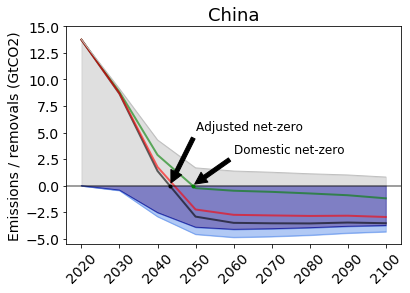

In [40]:
#for a single scene: e.g. SSP2: 'SSP2-19-SPA2-V17'
single_scen= CHN_netzero_plot.loc[CHN_netzero_plot.Scenario==('SSP2-19-SPA2-V17')].copy()
single_scen['New_total_CDR-25%leakage:AP']=single_scen['New_total_CDR-25%leakage:AP'].values*10**-3
single_scen['New_total_CDR']=single_scen['New_total_CDR'].values*10**-3
single_scen['CO2_Emissions']=single_scen['CO2_Emissions'].values*10**-3
single_scen['Total_GHG_w_25%BECCS_leakage:AP']=single_scen['Total_GHG_w_25%BECCS_leakage:AP'].values*10**-3
single_scen['Total_GHG']=single_scen['Total_GHG'].values*10**-3
single_scen['New_total_GHG:AP']=single_scen['New_total_GHG:AP'].values*10**-3

#modeled net GHG (original net zero)
sns.lineplot(x='Year',y='Total_GHG',data=single_scen, linewidth = 2, color = 'green', label = 'Modeled\nNet GHG emissions', alpha = 0.6)
#new net zero with fair share (w market implementation)
sns.lineplot(x='Year',y='New_total_GHG:AP',data=single_scen, linewidth = 2, color = 'black', label = 'Net GHG emissions\nw/ trading', alpha = 0.6)
#new net zero with leakage
sns.lineplot(x='Year',y='Total_GHG_w_25%BECCS_leakage:AP',data=single_scen, linewidth = 2, color = 'r', label = 'Net GHG emissions\nw/ 25%leakage', alpha = 0.6)
#New total CDR with more/less BECCS burden
sns.lineplot(x='Year',y='New_total_CDR',data=single_scen, linewidth = 1, label = 'CDR w/ trading',color='cornflowerblue',alpha = 0.6)
sns.lineplot(x='Year',y='New_total_CDR-25%leakage:AP',data=single_scen, linewidth = 1, label = 'CDR w/ leakage',color='darkblue',alpha = 0.6)
#original CO2 emissions (no change)
sns.lineplot(x='Year', y='CO2_Emissions',data = single_scen, linewidth = 1, label = 'Total GHG emissions', color='silver')

plt.fill_between(np.arange(2020,2110,10), single_scen['New_total_CDR-25%leakage:AP'].values, alpha=0.5, color='darkblue') 
plt.fill_between(np.arange(2020,2110,10), single_scen["CO2_Emissions"].values, alpha=0.5, color='silver') 
plt.fill_between(np.arange(2020,2110,10), single_scen['New_total_CDR-25%leakage:AP'].values, single_scen['New_total_CDR'].values, alpha=0.5, color='cornflowerblue') 

# plt.line(x = np.arange(2020,2100,10), y = 0)
plt.axhline(0, color='black', linestyle='-', linewidth=1.5, alpha=0.5)
plt.ylabel('Emissions / removals (GtCO2)', fontsize = 14)
plt.ylim(-5.5,15)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14, rotation = 45)
plt.xlabel("", fontsize = 14)
plt.title('China', fontsize = 18)
#plt.legend(loc = 'upper left', bbox_to_anchor=(1,1))
plt.legend().remove()

plt.plot([2043.19],[0],'.',color='black')
plt.annotate('Adjusted net-zero', fontsize = 12, xy=(2043.19,0), xytext=(2050,5.2)
            ,arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([2049.225],[0],'.',color='green')
plt.annotate('Domestic net-zero', fontsize = 12, xy=(2049.225,0), xytext=(2060,3)
            ,arrowprops=dict(facecolor='black', shrink=0.05))

#plt.savefig(plot_path + 'CHN-Netzero_SSP2-19-SPA2-V17_25%leakage.png',bbox_inches="tight")
plt.savefig(plot_path + 'CHN-illustrative_NetZero_SSP2_25%leakage.png',bbox_inches="tight")


In [23]:
#making df for EUR
EUR_netzero['New_total_CDR'] = EUR_netzero['TOTAL_CDR']+ EUR_netzero['BECCS_model_vs_fair_share_by_GDP']
EUR_netzero['New_total_CDR-25%leakage:AP']=EUR_netzero['New_total_CDR']-EUR_netzero['25%_leakage:AP']
EUR_netzero.loc[:,'New_total_CDR-25%leakage:AP'] = EUR_netzero.loc[:,'New_total_CDR-25%leakage:AP']*(-1)
EUR_netzero.loc[:,'New_total_CDR'] = EUR_netzero.loc[:,'New_total_CDR']*(-1)


In [17]:
EUR_netzero_yr.loc[EUR_netzero_yr.Scenario==('SSP2-19-SPA2-V17')
                  ][['Model_NetZero','NetZero_w_no_leakage','NetZero_w_25%leakage']]

,Model_NetZero,NetZero_w_no_leakage,NetZero_w_25%leakage
3,2050.739461,2042.329606,2043.783106


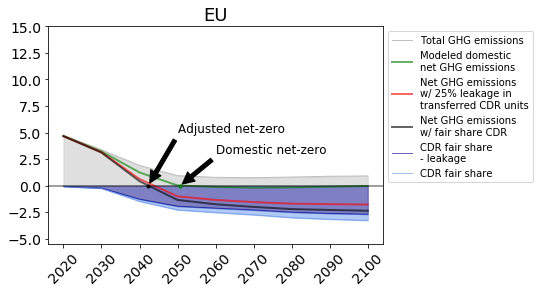

In [39]:
#for a single scene: e.g. SSP2: 'SSP2-19-SPA2-V17'
single_scen= EUR_netzero.loc[EUR_netzero.Scenario==('SSP2-19-SPA2-V17')].copy()
single_scen['New_total_CDR-25%leakage:AP']=single_scen['New_total_CDR-25%leakage:AP'].values*10**-3
single_scen['New_total_CDR']=single_scen['New_total_CDR'].values*10**-3
single_scen['CO2_Emissions']=single_scen['CO2_Emissions'].values*10**-3
single_scen['Total_GHG_w_25%BECCS_leakage:AP']=single_scen['Total_GHG_w_25%BECCS_leakage:AP'].values*10**-3
single_scen['Total_GHG']=single_scen['Total_GHG'].values*10**-3
single_scen['New_total_GHG:AP']=single_scen['New_total_GHG:AP'].values*10**-3

#original CO2 emissions (no change)
sns.lineplot(x='Year', y='CO2_Emissions',data = single_scen, linewidth = 1, label = 'Total GHG emissions', color='silver')
#modeled net GHG (original net zero)
sns.lineplot(x='Year',y='Total_GHG',data=single_scen, linewidth = 2, color = 'green', label = 'Modeled domestic\nnet GHG emissions', alpha = 0.6)
#new net zero with leakage
sns.lineplot(x='Year',y='Total_GHG_w_25%BECCS_leakage:AP',data=single_scen, linewidth = 2, color = 'r', label = 'Net GHG emissions\nw/ 25% leakage in\ntransferred CDR units', alpha = 0.6)
#new net zero with fair share (w market implementation)
sns.lineplot(x='Year',y='New_total_GHG:AP',data=single_scen, linewidth = 2, color = 'black', label = 'Net GHG emissions\nw/ fair share CDR', alpha = 0.6)
#New total CDR with more/less BECCS burden
sns.lineplot(x='Year',y='New_total_CDR-25%leakage:AP',data=single_scen, linewidth = 1, label = 'CDR fair share\n- leakage',color='darkblue',alpha = 0.6)
sns.lineplot(x='Year',y='New_total_CDR',data=single_scen, linewidth = 1, label = 'CDR fair share',color='cornflowerblue',alpha = 0.6)

plt.fill_between(np.arange(2020,2110,10), single_scen['New_total_CDR-25%leakage:AP'].values, alpha=0.5, color='darkblue') 
plt.fill_between(np.arange(2020,2110,10), single_scen["CO2_Emissions"].values, alpha=0.5, color='silver') 
plt.fill_between(np.arange(2020,2110,10), single_scen['New_total_CDR-25%leakage:AP'].values, single_scen['New_total_CDR'].values, alpha=0.5, color='cornflowerblue') 

# plt.line(x = np.arange(2020,2100,10), y = 0)
plt.axhline(0, color='black', linestyle='-', linewidth=1.5, alpha=0.5)
#plt.ylabel('Emissions / removals (GtCO2)', fontsize = 14)
plt.ylabel("")
plt.yticks(fontsize = 14)
plt.ylim(-5.5,15)
plt.xticks(fontsize = 14, rotation = 45)
plt.xlabel("", fontsize = 14)
plt.title("EU",fontsize = 18)
plt.legend(loc = 'upper left', bbox_to_anchor=(1,1))

plt.plot([2042.3],[0],'.',color='black')
plt.annotate('Adjusted net-zero', fontsize = 12, xy=(2042.3,0), xytext=(2050,5)
            ,arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([2050.739],[0],'.',color='green')
plt.annotate('Domestic net-zero', fontsize = 12, xy=(2050.739,0), xytext=(2060,3)
            ,arrowprops=dict(facecolor='black', shrink=0.05))

# plt.legend(loc='upper right', fontsize = 14)

plt.savefig(plot_path + 'EUR-illustrative_Netzero_SSP2_25%leakage.png',bbox_inches="tight")


In [26]:
#making df for USA 
USA_netzero['New_total_CDR'] = USA_netzero['TOTAL_CDR']+ USA_netzero['BECCS_model_vs_fair_share_by_CUM_POP']
USA_netzero['New_total_CDR-25%leakage:CPCE']=USA_netzero['New_total_CDR']-USA_netzero['25%_leakage:CPCE']
USA_netzero.loc[:,'New_total_CDR-25%leakage:CPCE'] = USA_netzero.loc[:,'New_total_CDR-25%leakage:CPCE']*(-1)
USA_netzero.loc[:,'New_total_CDR'] = USA_netzero.loc[:,'New_total_CDR']*(-1)

# USA_netzero.loc[:,'Total_GHG_w_5%BECCS_leakage:AP'] = USA_netzero.loc[:,'Total_GHG_w_5%BECCS_leakage:AP']*10**-3
# USA_netzero.loc[:,'CO2_Emissions'] = USA_netzero.loc[:,'CO2_Emissions']*10**-3
# USA_netzero.loc[:,'Total_GHG'] = USA_netzero.loc[:,'Total_GHG']*10**-3

In [43]:
USA_netzero_yr.loc[USA_netzero_yr.Scenario==('SSP2-19-SPA2-V17')
                  ][['Model_NetZero','NetZero_w_no_leakage','NetZero_w_25%leakage']]

,Model_NetZero,NetZero_w_no_leakage,NetZero_w_25%leakage
3,2046.607239,2039.643781,2040.834823


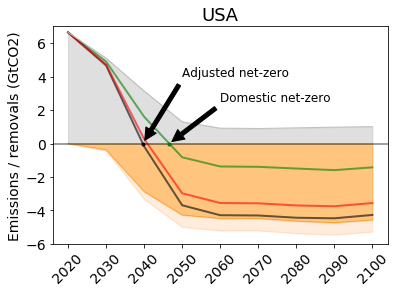

In [38]:
#for a single scene: e.g. SSP2: 'SSP2-19-SPA2-V17'
single_scen= USA_netzero.loc[USA_netzero.Scenario==('SSP2-19-SPA2-V17')].copy()
single_scen['New_total_CDR-25%leakage:CPCE']=single_scen['New_total_CDR-25%leakage:CPCE'].values*10**-3
single_scen['New_total_CDR']=single_scen['New_total_CDR'].values*10**-3
single_scen['CO2_Emissions']=single_scen['CO2_Emissions'].values*10**-3
single_scen['Total_GHG_w_25%BECCS_leakage:CPCE']=single_scen['Total_GHG_w_25%BECCS_leakage:CPCE'].values*10**-3
single_scen['Total_GHG']=single_scen['Total_GHG'].values*10**-3
single_scen['New_total_GHG:CPCE']=single_scen['New_total_GHG:CPCE'].values*10**-3

#modeled net GHG (original net zero)
sns.lineplot(x='Year',y='Total_GHG',data=single_scen, linewidth = 2, color = 'green', label = 'Modeled domestic\nNet GHG emissions', alpha = 0.6)
#new net zero with fair share (w market implementation)
sns.lineplot(x='Year',y='New_total_GHG:CPCE',data=single_scen, linewidth = 2, color = 'black', label = 'Net GHG emissions\nw/ trading', alpha = 0.6)
#new net zero with leakage
sns.lineplot(x='Year',y='Total_GHG_w_25%BECCS_leakage:CPCE',data=single_scen, linewidth = 2, color = 'r', label = 'Net GHG emissions\nw/ 25%leakage', alpha = 0.6)
#New total CDR with more/less BECCS burden
sns.lineplot(x='Year',y='New_total_CDR',data=single_scen, linewidth = 1, label = 'CDR w/ trading',color='peachpuff',alpha = 0.6)
sns.lineplot(x='Year',y='New_total_CDR-25%leakage:CPCE',data=single_scen, linewidth = 1, label = 'CDR w/ leakage',color='darkorange',alpha = 0.6)
#original CO2 emissions (no change)
sns.lineplot(x='Year', y='CO2_Emissions',data = single_scen, linewidth = 1, label = 'Total GHG emissions', color='silver')

plt.fill_between(np.arange(2020,2110,10), single_scen['New_total_CDR-25%leakage:CPCE'].values, alpha=0.5, color='darkorange') 
plt.fill_between(np.arange(2020,2110,10), single_scen["CO2_Emissions"].values, alpha=0.5, color='silver') 
plt.fill_between(np.arange(2020,2110,10), single_scen['New_total_CDR-25%leakage:CPCE'].values, single_scen['New_total_CDR'].values, alpha=0.5, color='peachpuff') 

# plt.line(x = np.arange(2020,2100,10), y = 0)
plt.axhline(0, color='black', linestyle='-', linewidth=1.5, alpha=0.5)
plt.ylabel('Emissions / removals (GtCO2)', fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(-6,7)
plt.xticks(fontsize = 14, rotation = 45)
plt.xlabel("", fontsize = 14)
plt.title('USA',fontsize = 18)
plt.legend().remove()
#plt.legend(loc = 'upper left', bbox_to_anchor=(1,1))
plt.plot([2039.64],[0],'.',color='black')
plt.annotate('Adjusted net-zero', fontsize = 12, xy=(2039.64,0), xytext=(2050,4)
            ,arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([2046.607],[0],'.',color='green')
plt.annotate('Domestic net-zero', fontsize = 12, xy=(2046.607,0), xytext=(2060,2.5)
            ,arrowprops=dict(facecolor='black', shrink=0.05))

#plt.savefig(plot_path + 'USA-Netzero_SSP2-19-SPA2-V17_25%leakage.png',bbox_inches="tight")
plt.savefig(plot_path + 'USA-illustrative_Netzero_SSP2_25%leakage.png',bbox_inches="tight")

### delay 2057.63 to 2066.81


In [32]:
#making df for Russia 
RUS_netzero['New_total_CDR'] = RUS_netzero['TOTAL_CDR']+ RUS_netzero['BECCS_model_vs_fair_share_by_CUM_POP']
RUS_netzero['New_total_CDR-25%leakage:CPCE']=RUS_netzero['New_total_CDR']-RUS_netzero['25%_leakage:CPCE']
RUS_netzero.loc[:,'New_total_CDR-25%leakage:CPCE'] = RUS_netzero.loc[:,'New_total_CDR-25%leakage:CPCE']*(-1)
RUS_netzero.loc[:,'New_total_CDR'] = RUS_netzero.loc[:,'New_total_CDR']*(-1)

# USA_netzero.loc[:,'Total_GHG_w_5%BECCS_leakage:AP'] = USA_netzero.loc[:,'Total_GHG_w_5%BECCS_leakage:AP']*10**-3
# USA_netzero.loc[:,'CO2_Emissions'] = USA_netzero.loc[:,'CO2_Emissions']*10**-3
# USA_netzero.loc[:,'Total_GHG'] = USA_netzero.loc[:,'Total_GHG']*10**-3

In [49]:
RUS_netzero_yr.loc[RUS_netzero_yr.Scenario==('SSP2-19-SPA2-V17')
                  ][['Model_NetZero','NetZero_w_no_leakage','NetZero_w_25%leakage']]

,Model_NetZero,NetZero_w_no_leakage,NetZero_w_25%leakage
3,2078.490634,2042.660859,2045.32392


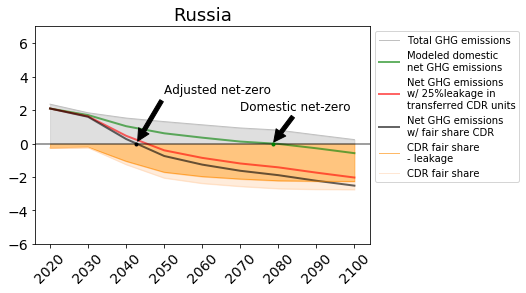

In [37]:
#for a single scene: e.g. SSP2: 'SSP2-19-SPA2-V17'
single_scen= RUS_netzero.loc[RUS_netzero.Scenario==('SSP2-19-SPA2-V17')].copy()
single_scen['New_total_CDR-25%leakage:CPCE']=single_scen['New_total_CDR-25%leakage:CPCE'].values*10**-3
single_scen['New_total_CDR']=single_scen['New_total_CDR'].values*10**-3
single_scen['CO2_Emissions']=single_scen['CO2_Emissions'].values*10**-3
single_scen['Total_GHG_w_25%BECCS_leakage:CPCE']=single_scen['Total_GHG_w_25%BECCS_leakage:CPCE'].values*10**-3
single_scen['Total_GHG']=single_scen['Total_GHG'].values*10**-3
single_scen['New_total_GHG:CPCE']=single_scen['New_total_GHG:CPCE'].values*10**-3

#original CO2 emissions (no change)
sns.lineplot(x='Year', y='CO2_Emissions',data = single_scen, linewidth = 1, label = 'Total GHG emissions', color='silver')
#modeled net GHG (original net zero)
sns.lineplot(x='Year',y='Total_GHG',data=single_scen, linewidth = 2, color = 'green', label = 'Modeled domestic\nnet GHG emissions', alpha = 0.6)
#new net zero with leakage
sns.lineplot(x='Year',y='Total_GHG_w_25%BECCS_leakage:CPCE',data=single_scen, linewidth = 2, color = 'r', label = 'Net GHG emissions\nw/ 25%leakage in\ntransferred CDR units', alpha = 0.6)
#new net zero with fair share (w market implementation)
sns.lineplot(x='Year',y='New_total_GHG:CPCE',data=single_scen, linewidth = 2, color = 'black', label = 'Net GHG emissions\nw/ fair share CDR', alpha = 0.6)
#New total CDR with more/less BECCS burden
sns.lineplot(x='Year',y='New_total_CDR-25%leakage:CPCE',data=single_scen, linewidth = 1, label = 'CDR fair share\n- leakage',color='darkorange',alpha = 0.6)
sns.lineplot(x='Year',y='New_total_CDR',data=single_scen, linewidth = 1, label = 'CDR fair share',color='peachpuff',alpha = 0.6)

plt.fill_between(np.arange(2020,2110,10), single_scen['New_total_CDR-25%leakage:CPCE'].values, alpha=0.5, color='darkorange') 
plt.fill_between(np.arange(2020,2110,10), single_scen["CO2_Emissions"].values, alpha=0.5, color='silver') 
plt.fill_between(np.arange(2020,2110,10), single_scen['New_total_CDR-25%leakage:CPCE'].values, single_scen['New_total_CDR'].values, alpha=0.5, color='peachpuff') 

# plt.line(x = np.arange(2020,2100,10), y = 0)
plt.axhline(0, color='black', linestyle='-', linewidth=1.5, alpha=0.5)
#plt.ylabel('Emissions / removals (GtCO2)', fontsize = 14)
plt.ylabel("")
plt.ylim(-6,7)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14, rotation = 45)
plt.xlabel("", fontsize = 14)
plt.title('Russia',fontsize = 18)

plt.legend(loc = 'upper left', bbox_to_anchor=(1,1))

plt.plot([2042.66],[0],'.',color='black')
plt.annotate('Adjusted net-zero', fontsize = 12, xy=(2042.66,0), xytext=(2050,3)
            ,arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([2078.49],[0],'.',color='green')
plt.annotate('Domestic net-zero', fontsize = 12, xy=(2078.49,0), xytext=(2070,2)
            ,arrowprops=dict(facecolor='black', shrink=0.05))

#plt.savefig(plot_path + 'RUS-Netzero_SSP2-19-SPA2-V17_25%leakage.png',bbox_inches="tight")
plt.savefig(plot_path + 'RUS-illustrative_Netzero_SSP2_25%leakage.png',bbox_inches="tight")

### delay 2057.63 to 2066.81


## illustrative pathways for AFR (CPCE) and IND (AP)

In [17]:
#AP:IND, CPCE:AFR
IND_netzero=netzero_all_plot.loc[netzero_all_plot.Region==('IND')].copy()
AFR_netzero=netzero_all_plot.loc[netzero_all_plot.Region==('AFR')].copy()
IND_netzero_yr=create_regional_netzero_table_AP(IND_netzero)
AFR_netzero_yr=create_regional_netzero_table_CPCE(AFR_netzero)

IND_netzero['New_total_CDR'] = IND_netzero['TOTAL_CDR']+ IND_netzero['BECCS_model_vs_fair_share_by_GDP']
#IND_netzero['New_total_CDR-25%leakage:AP']=IND_netzero['New_total_CDR']-IND_netzero['25%_leakage:AP']
#IND_netzero.loc[:,'New_total_CDR-25%leakage:AP'] = IND_netzero.loc[:,'New_total_CDR-25%leakage:AP']*(-1)
IND_netzero.loc[:,'New_total_CDR'] = IND_netzero.loc[:,'New_total_CDR']*(-1)

AFR_netzero['New_total_CDR'] = AFR_netzero['TOTAL_CDR']+ AFR_netzero['BECCS_model_vs_fair_share_by_CUM_POP']
#AFR_netzero['New_total_CDR-25%leakage:CPCE']=AFR_netzero['New_total_CDR']-AFR_netzero['25%_leakage:CPCE']
#AFR_netzero.loc[:,'New_total_CDR-25%leakage:CPCE'] = AFR_netzero.loc[:,'New_total_CDR-25%leakage:CPCE']*(-1)
AFR_netzero.loc[:,'New_total_CDR'] = AFR_netzero.loc[:,'New_total_CDR']*(-1)


In [21]:
IND_netzero

,Unnamed: 0,MODEL,Scenario,Year,Region,Total_GHG,TOTAL_CDR,CDR_fair_share_by_GDP,CDR_fair_share_by_CUM_POP,BECCS,BECCS_fair_share_by_GDP,BECCS_fair_share_by_CUM_POP,BECCS_model_vs_fair_share_by_CUM_POP,BECCS_model_vs_fair_share_by_GDP,CO2_Emissions,5%_leakage:AP,10%_leakage:AP,15%_leakage:AP,20%_leakage:AP,25%_leakage:AP,5%_leakage:CPCE,10%_leakage:CPCE,15%_leakage:CPCE,20%_leakage:CPCE,25%_leakage:CPCE,New_total_GHG:AP,New_total_GHG:CPCE,Total_GHG_w_5%BECCS_leakage:AP,Total_GHG_w_10%BECCS_leakage:AP,Total_GHG_w_15%BECCS_leakage:AP,Total_GHG_w_20%BECCS_leakage:AP,Total_GHG_w_25%BECCS_leakage:AP,Total_GHG_w_5%BECCS_leakage:CPCE,Total_GHG_w_10%BECCS_leakage:CPCE,Total_GHG_w_15%BECCS_leakage:CPCE,Total_GHG_w_20%BECCS_leakage:CPCE,Total_GHG_w_25%BECCS_leakage:CPCE,New_total_CDR,New_total_CDR-25%leakage:AP
27,27,REMIND,SSP1-19-SPA1-V17,2020,IND,4660.00,0.0058,0.0,0.0,0.0046,0.0,0.0,-0.0046,-0.0046,4660.0058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4660.0046,4660.0046,4660.0046,4660.0046,4660.0046,4660.0046,4660.0046,4660.0046,4660.0046,4660.0046,4660.0046,4660.0046,-0.0012,-0.0012
28,28,REMIND,SSP1-19-SPA1-V17,2030,IND,3886.00,36.1603,0.0,0.0,36.1600,0.0,0.0,-36.1600,-36.1600,3922.1603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3922.1600,3922.1600,3922.1600,3922.1600,3922.1600,3922.1600,3922.1600,3922.1600,3922.1600,3922.1600,3922.1600,3922.1600,-0.0003,-0.0003
29,29,REMIND,SSP1-19-SPA1-V17,2040,IND,2579.00,334.9002,0.0,0.0,334.9000,0.0,0.0,-334.9000,-334.9000,2913.9002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2913.9000,2913.9000,2913.9000,2913.9000,2913.9000,2913.9000,2913.9000,2913.9000,2913.9000,2913.9000,2913.9000,2913.9000,-0.0002,-0.0002
30,30,REMIND,SSP1-19-SPA1-V17,2050,IND,1358.00,824.4681,0.0,0.0,824.4000,0.0,0.0,-824.4000,-824.4000,2182.4681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2182.4000,2182.4000,2182.4000,2182.4000,2182.4000,2182.4000,2182.4000,2182.4000,2182.4000,2182.4000,2182.4000,2182.4000,-0.0681,-0.0681
31,31,REMIND,SSP1-19-SPA1-V17,2060,IND,649.10,916.8084,0.0,0.0,916.6000,0.0,0.0,-916.6000,-916.6000,1565.9084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1565.7000,1565.7000,1565.7000,1565.7000,1565.7000,1565.7000,1565.7000,1565.7000,1565.7000,1565.7000,1565.7000,1565.7000,-0.2084,-0.2084
32,32,REMIND,SSP1-19-SPA1-V17,2070,IND,167.30,918.6589,0.0,0.0,916.6000,0.0,0.0,-916.6000,-916.6000,1085.9589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1083.9000,1083.9000,1083.9000,1083.9000,1083.9000,1083.9000,1083.9000,1083.9000,1083.9000,1083.9000,1083.9000,1083.9000,-2.0589,-2.0589
33,33,REMIND,SSP1-19-SPA1-V17,2080,IND,-78.47,979.9062,0.0,0.0,916.6000,0.0,0.0,-916.6000,-916.6000,901.4362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,838.1300,838.1300,838.1300,838.1300,838.1300,838.1300,838.1300,838.1300,838.1300,838.1300,838.1300,838.1300,-63.3062,-63.3062
34,34,REMIND,SSP1-19-SPA1-V17,2090,IND,-279.90,1042.2847,0.0,0.0,916.6000,0.0,0.0,-916.6000,-916.6000,762.3847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,636.7000,636.7000,636.7000,636.7000,636.7000,636.7000,636.7000,636.7000,636.7000,636.7000,636.7000,636.7000,-125.6847,-125.6847
35,35,REMIND,SSP1-19-SPA1-V17,2100,IND,-367.30,990.4062,0.0,0.0,916.6000,0.0,0.0,-916.6000,-916.6000,623.1062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,549.3000,549.3000,549.3000,549.3000,549.3000,549.3000,549.3000,549.3000,549.3000,549.3000,549.3000,549.3000,-73.8062,-73.8062
135,135,REMIND,SSP2-19-SPA2-V17,2020,IND,4713.00,0.0057,0.0,0.0,0.0045,0.0,0.0,-0.0045,-0.0045,4713.0057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4713.0045,4713.0045,4713.0045,4713.0045,4713.0045,4713.0045,4713.0045,4713.0045,4713.0045,4713.0045,4713.0045,4713.0045,-0.0012,-0.0012


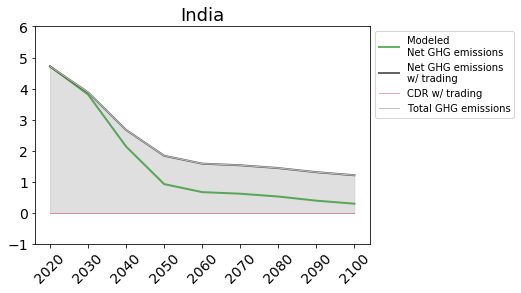

In [30]:
#for a single scene: e.g. SSP2: 'SSP2-19-SPA2-V17'
single_scen= IND_netzero.loc[IND_netzero.Scenario==('SSP2-19-SPA2-V17')].copy()
#single_scen['New_total_CDR-25%leakage:AP']=single_scen['New_total_CDR-25%leakage:AP'].values*10**-3
single_scen['New_total_CDR']=single_scen['New_total_CDR'].values*10**-3
single_scen['CO2_Emissions']=single_scen['CO2_Emissions'].values*10**-3
#single_scen['Total_GHG_w_25%BECCS_leakage:AP']=single_scen['Total_GHG_w_25%BECCS_leakage:AP'].values*10**-3
single_scen['Total_GHG']=single_scen['Total_GHG'].values*10**-3
single_scen['New_total_GHG:AP']=single_scen['New_total_GHG:AP'].values*10**-3

#modeled net GHG (original net zero)
sns.lineplot(x='Year',y='Total_GHG',data=single_scen, linewidth = 2, color = 'green', label = 'Modeled\nNet GHG emissions', alpha = 0.6)
#new net zero with fair share (w market implementation)
sns.lineplot(x='Year',y='New_total_GHG:AP',data=single_scen, linewidth = 2, color = 'black', label = 'Net GHG emissions\nw/ trading', alpha = 0.6)
#new net zero with leakage
#sns.lineplot(x='Year',y='Total_GHG_w_25%BECCS_leakage:AP',data=single_scen, linewidth = 2, color = 'r', label = 'Net GHG emissions\nw/ 25%leakage', alpha = 0.6)
#New total CDR with more/less BECCS burden
sns.lineplot(x='Year',y='New_total_CDR',data=single_scen, linewidth = 1, label = 'CDR w/ trading',color='palevioletred',alpha = 0.6)
#sns.lineplot(x='Year',y='New_total_CDR-25%leakage:AP',data=single_scen, linewidth = 1, label = 'CDR w/ leakage',color='darkblue',alpha = 0.6)
#original CO2 emissions (no change)
sns.lineplot(x='Year', y='CO2_Emissions',data = single_scen, linewidth = 1, label = 'Total GHG emissions', color='silver')

plt.fill_between(np.arange(2020,2110,10), single_scen['New_total_CDR'].values, alpha=0.5, color='palevioletred') 
plt.fill_between(np.arange(2020,2110,10), single_scen["CO2_Emissions"].values, alpha=0.5, color='silver') 
#plt.fill_between(np.arange(2020,2110,10), single_scen['New_total_CDR-25%leakage:AP'].values, single_scen['New_total_CDR'].values, alpha=0.5, color='cornflowerblue') 

# plt.line(x = np.arange(2020,2100,10), y = 0)
#plt.axhline(0, color='black', linestyle='-', linewidth=1.5, alpha=0.5)
#plt.ylabel('Emissions / removals (GtCO2)', fontsize = 14)
plt.ylabel("")
plt.yticks(fontsize = 14)
plt.ylim(-1,6)
plt.xticks(fontsize = 14, rotation = 45)
plt.xlabel("", fontsize = 14)
plt.title("India",fontsize = 18)
plt.legend(loc = 'upper left', bbox_to_anchor=(1,1))
# plt.legend(loc='upper right', fontsize = 14)

plt.savefig(plot_path + 'IND-illustrative_Netzero_SSP2.png',bbox_inches="tight")


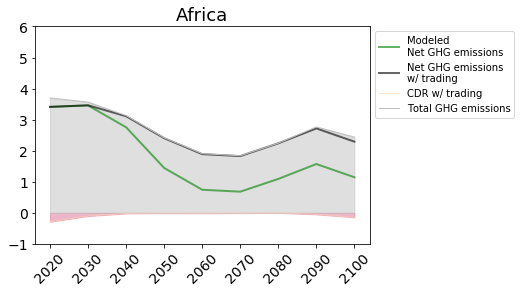

In [29]:
#for a single scene: e.g. SSP2: 'SSP2-19-SPA2-V17'
single_scen= AFR_netzero.loc[AFR_netzero.Scenario==('SSP2-19-SPA2-V17')].copy()
#single_scen['New_total_CDR-25%leakage:CPCE']=single_scen['New_total_CDR-25%leakage:CPCE'].values*10**-3
single_scen['New_total_CDR']=single_scen['New_total_CDR'].values*10**-3
single_scen['CO2_Emissions']=single_scen['CO2_Emissions'].values*10**-3
#single_scen['Total_GHG_w_25%BECCS_leakage:CPCE']=single_scen['Total_GHG_w_25%BECCS_leakage:CPCE'].values*10**-3
single_scen['Total_GHG']=single_scen['Total_GHG'].values*10**-3
single_scen['New_total_GHG:CPCE']=single_scen['New_total_GHG:CPCE'].values*10**-3

#modeled net GHG (original net zero)
sns.lineplot(x='Year',y='Total_GHG',data=single_scen, linewidth = 2, color = 'green', label = 'Modeled\nNet GHG emissions', alpha = 0.6)
#new net zero with fair share (w market implementation)
sns.lineplot(x='Year',y='New_total_GHG:CPCE',data=single_scen, linewidth = 2, color = 'black', label = 'Net GHG emissions\nw/ trading', alpha = 0.6)
#new net zero with leakage
#sns.lineplot(x='Year',y='Total_GHG_w_25%BECCS_leakage:CPCE',data=single_scen, linewidth = 2, color = 'r', label = 'Net GHG emissions\nw/ 25%leakage', alpha = 0.6)
#New total CDR with more/less BECCS burden
sns.lineplot(x='Year',y='New_total_CDR',data=single_scen, linewidth = 1, label = 'CDR w/ trading',color='peachpuff',alpha = 0.6)
#sns.lineplot(x='Year',y='New_total_CDR-25%leakage:CPCE',data=single_scen, linewidth = 1, label = 'CDR w/ leakage',color='darkorange',alpha = 0.6)
#original CO2 emissions (no change)
sns.lineplot(x='Year', y='CO2_Emissions',data = single_scen, linewidth = 1, label = 'Total GHG emissions', color='silver')

plt.fill_between(np.arange(2020,2110,10), single_scen['New_total_CDR'].values, alpha=0.5, color='palevioletred') 
plt.fill_between(np.arange(2020,2110,10), single_scen["CO2_Emissions"].values, alpha=0.5, color='silver') 
#plt.fill_between(np.arange(2020,2110,10), single_scen['New_total_CDR-25%leakage:CPCE'].values, single_scen['New_total_CDR'].values, alpha=0.5, color='peachpuff') 

# plt.line(x = np.arange(2020,2100,10), y = 0)
#plt.axhline(0, color='black', linestyle='-', linewidth=1.5, alpha=0.5)
#plt.ylabel('Emissions / removals (GtCO2)', fontsize = 14)
plt.ylabel("")
plt.ylim(-1,6)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14, rotation = 45)
plt.xlabel("", fontsize = 14)
plt.title('Africa',fontsize = 18)

plt.legend(loc = 'upper left', bbox_to_anchor=(1,1))

plt.savefig(plot_path + 'AFR-illustrative_Netzero_SSP2.png',bbox_inches="tight")

### delay 2057.63 to 2066.81
